In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Research/Fake_News_Detection/English Fake news/final_en.csv")
df

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1
...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",0
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,1
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,1
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",0


**Data Pre-processing**

In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
df['lebel'].value_counts()

1    5000
0    5000
Name: lebel, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['lebel']=lb.fit_transform(df['lebel'])

In [ ]:
#merging the news headline and title
df['content_data'] = df['title']+' '+df['text']

In [ ]:
!pip install stemming
from stemming.porter2 import stem
df['content_data'] = df['content_data'].apply(stem)

  Preparing metadata (setup.py) ... done
  Created wheel for stemming: filename=stemming-1.0.1-py3-none-any.whl size=11123 sha256=2325e15a93690ca1634b3dfcdf72cb4ae08095eee69250bdcb1daff4cc3fce3f
  Stored in directory: /root/.cache/pip/wheels/c5/f9/3f/8fe1ec182ce66145d7ded39bad9a690960469dc350fbec0181
Successfully built stemming


In [ ]:
X=df['content_data']
Y=df['lebel']

**Tf-IDF Vectorization**

In [ ]:
#TfIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorize = vectorizer.fit_transform(X)


In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

**Support Vector Machine(SVM)**

Fold: 0 0.9863333333333333
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1481
           1       0.98      0.99      0.99      1519

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 1 0.988
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1490
           1       0.99      0.99      0.99      1510

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 2 0.9836666666666667
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1534
           1       0.98      0.99      0.98      1466

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weight

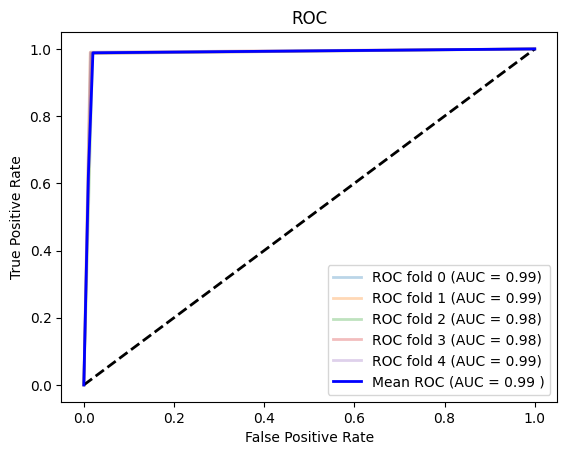

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
clf = SVC()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1544   23]
 [  14 1419]]


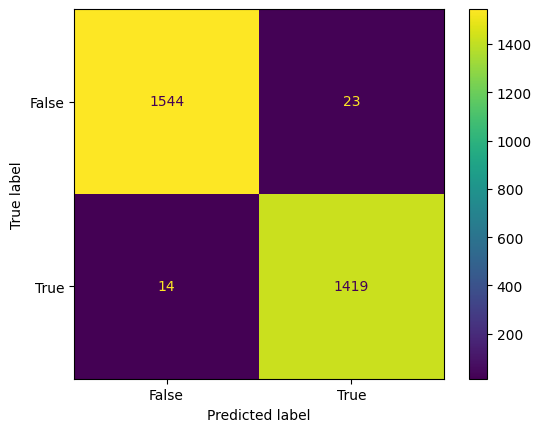

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Random Forest(RF)**

Fold: 0 : 0.9803333333333333
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1481
           1       0.98      0.98      0.98      1519

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Fold: 1 : 0.9853333333333333
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1490
           1       0.98      0.99      0.99      1510

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 2 : 0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1534
           1       0.98      0.98      0.98      1466

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.

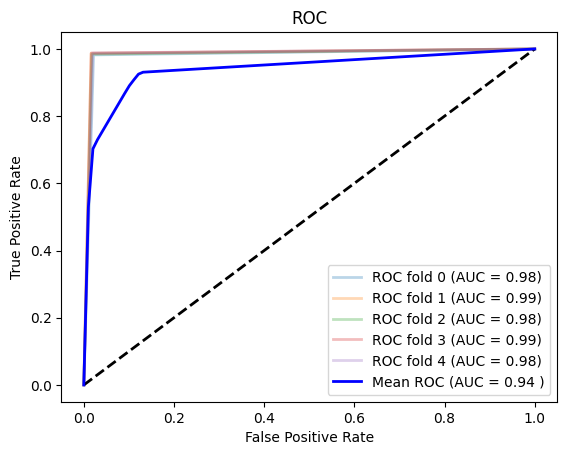

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create the Random Forest classifier
rf_clf = RandomForestClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)
  # Train the classifier
  rf_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = rf_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1536   31]
 [  18 1415]]


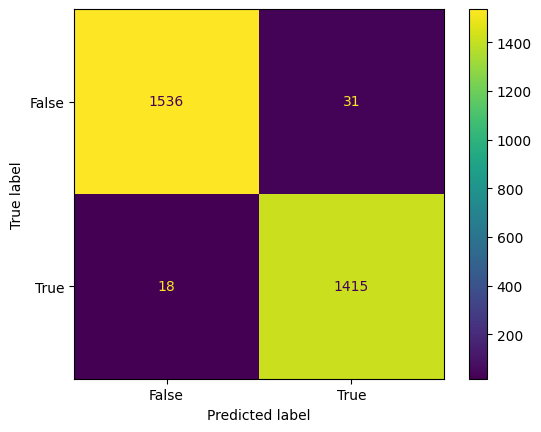

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, rf_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
# Install the lime library if you haven't already

!pip install lime

from lime import lime_tabular

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)

# Train a classifier (Random Forest in this example)
#classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#classifier.fit(X_train, y_train)

# Use LIME to explain a specific instance
explainer = lime_tabular.LimeTabularExplainer(x_train, mode='classification')
instance_to_explain = x_test[0]

# Explain the prediction for the instance
explanation = explainer.explain_instance(instance_to_explain, rf_clf.predict_proba)

# Print the explanation
print(explanation.as_list())

[('49671', 0.13741559410352677), ('60526', -0.06613361462788013), ('12976', -0.0657944078359316), ('56612', 0.05486418029074218), ('28733', 0.04195086423138112), ('30070', -0.036468690588240225), ('27061', -0.03538573562287066), ('56597', -0.035186917031205814), ('26821', -0.03433226004711993), ('57244', 0.025257571788662635)]


**Decision Tree(DT)**

Fold: 0 : 0.994
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1481
           1       0.99      1.00      0.99      1519

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 1 : 0.9926666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1490
           1       0.99      0.99      0.99      1510

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Fold: 2 : 0.9913333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1534
           1       0.99      0.99      0.99      1466

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000


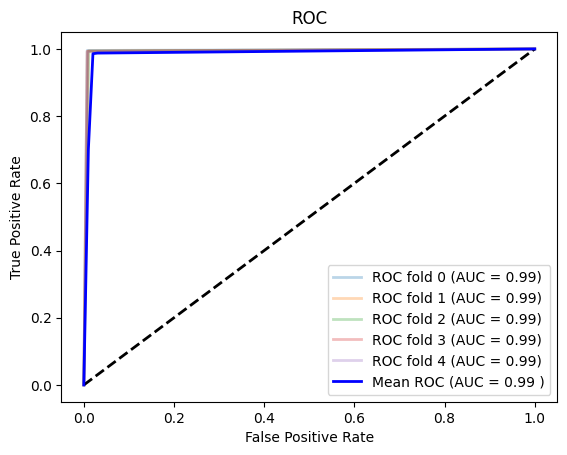

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create the Random Forest classifier
dt_clf = DecisionTreeClassifier()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)
  # Train the classifier
  dt_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = dt_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1555   12]
 [  12 1421]]


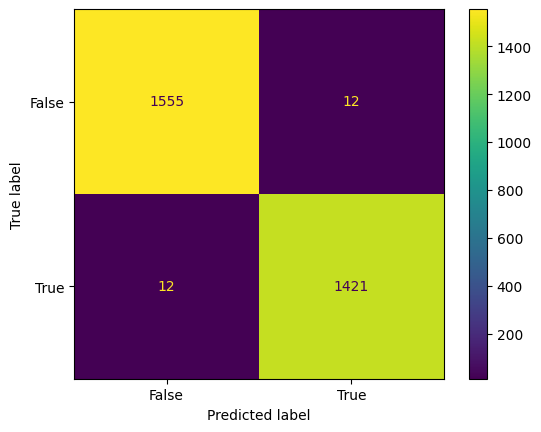

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, dt_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Naive Bayes (NB)**

Fold: 0 : 0.8363333333333334
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1481
           1       0.87      0.80      0.83      1519

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

Fold: 1 : 0.8383333333333334
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1490
           1       0.87      0.80      0.83      1510

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000

Fold: 2 : 0.837
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1534
           1       0.86      0.80      0.83      1466

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000


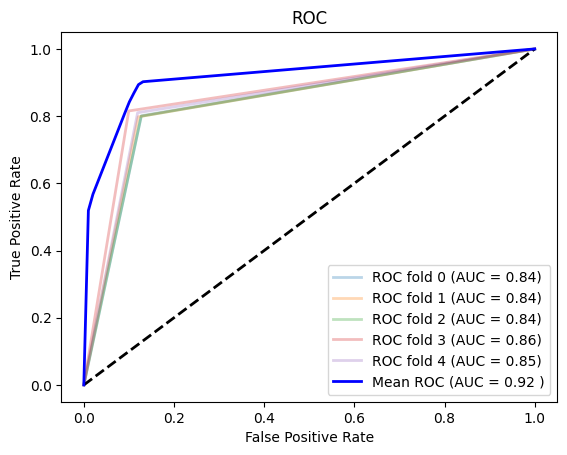

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes classifier
NB_clf = GaussianNB()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)

  # Convert sparse matrices to dense matrices
  x_train = x_train.toarray()
  x_test = x_test.toarray()

  # Train the classifier
  NB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = NB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1380  187]
 [ 272 1161]]


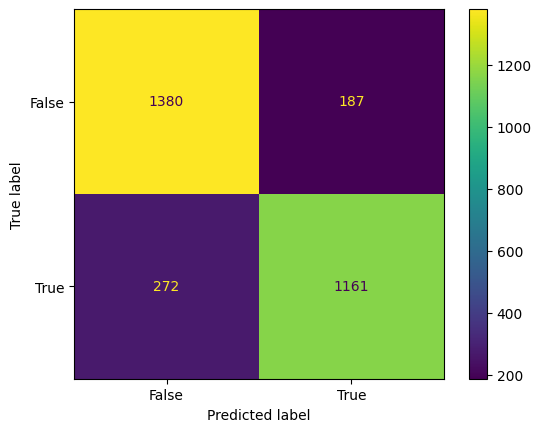

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Gradient Boosting (GB)**

In [ ]:
#Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(XV_train,Y_train)

GradientBoostingClassifier(random_state=0)

y_test_prediction_GB = GBC.predict(XV_test)
print("Accuracy Score:",accuracy_score(Y_test,y_test_prediction_GB))

Fold: 0 : 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1481
           1       0.99      1.00      1.00      1519

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      0.99      0.99      3000

Fold: 1 : 0.9953333333333333
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1490
           1       0.99      1.00      1.00      1510

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Fold: 2 : 0.992
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1534
           1       0.99      1.00      0.99      1466

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg 

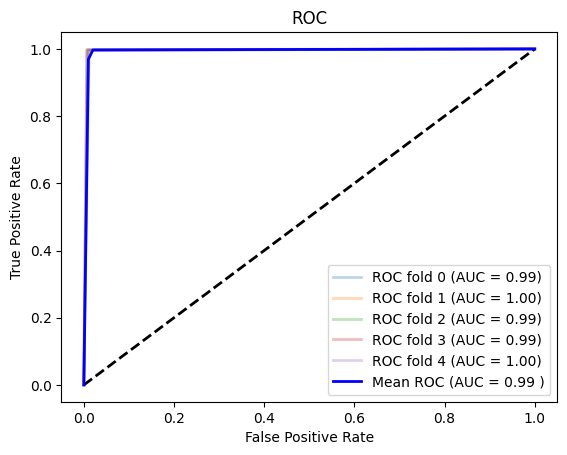

In [ ]:
#Gradient Boosting Algorithm
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(random_state=0)

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_vectorize, Y, test_size=0.30, random_state=i)
  # Train the classifier
  GB_clf.fit(x_train, y_train)
  # Make predictions
  y_pred = GB_clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i,":", accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1557   10]
 [   4 1429]]


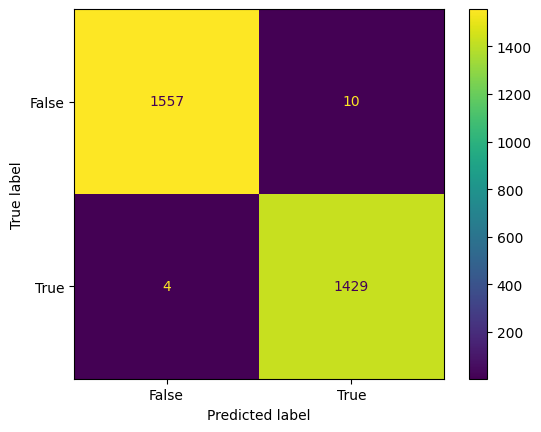

In [ ]:
#  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, GB_clf.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

**Glove**

In [ ]:
# code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np



# create the dict.
tokenizer = Tokenizer()
X_GT = tokenizer.fit_on_texts(X)

In [ ]:
from sklearn.svm import SVC

# Create the SVM classifier
clf = SVC()

for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(X_GT, Y, test_size=0.30, random_state=i)
  # Train the classifier
  clf.fit(x_train, y_train)
  # Make predictions
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Fold:",i, accuracy)
  # y_true and y_pred are arrays of true and predicted labels
  report = classification_report(y_test, y_pred)
  print(report)
  fpr, tpr, t =metrics.roc_curve(y_test, y_pred)
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
  i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

TypeError: Expected sequence or array-like, got <class 'NoneType'>

**Word2Text**

In [ ]:
# Install the gensim library if you haven't already

!pip install gensim

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the punkt tokenizer

# Tokenize the text into a list of sentences, where each sentence is a list of words
tokenized_data = [word_tokenize(sentence.lower()) for sentence in nltk.sent_tokenize(X)]

# Define and train the Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model to a file (optional)
model.save('word2vec_model.bin')

# Example: Accessing the vector representation for a specific word
word = 'example'
vector_representation = model.wv[word]
print(f"Vector representation for '{word}': {vector_representation}")


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-02-02 03:43:41--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-02-02 03:43:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-02 03:43:42--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# List the files in the current directory
!ls

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Absolute path to the GloVe file in Google Colab
absolute_glove_path = os.path.join(current_dir, 'glove.6B.50d.txt')
absolute_glove_path

'/content/glove.6B.50d.txt'

In [ ]:
!head glove.6B.50d.txt

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581
, 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392
. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.41328 -0.42353

In [ ]:
glove_path = 'glove.6B.50d.txt'
new_glove_path = 'cleaned_glove.6B.50d.txt'

with open(glove_path, 'r', encoding='utf-8') as input_file, open(new_glove_path, 'w', encoding='utf-8') as output_file:
    # Skip non-numeric lines until a valid header is found
    header_line = input_file.readline().strip()
    while not all(part.isdigit() for part in header_line.split()):
        header_line = input_file.readline().strip()

    print(f"Header: {header_line}")
    output_file.write(header_line + '\n')

    # Write the remaining lines
    for line in input_file:
        output_file.write(line)




Header: 


In [ ]:
!head new_glove_path

head: cannot open 'new_glove_path' for reading: No such file or directory


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Absolute path to the GloVe file in Google Colab
absolute_glove_path = os.path.join(current_dir, 'cleaned_glove.6B.50d.txt')
absolute_glove_path

'/content/cleaned_glove.6B.50d.txt'

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from gensim.models import KeyedVectors

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Load GloVe embeddings (change the path to the GloVe file)
glove_model = KeyedVectors.load_word2vec_format('/content/cleaned_glove.6B.50d.txt', binary=False)

# Sample dataset and labels
#texts = ["Text of document 1", "Text of document 2", ...]
#labels = [0, 1, ...]  # Example binary labels
X=df['content_data']
Y=df['lebel']

# Tokenization and feature extraction using GloVe
def extract_features(text):
    tokens = nltk.word_tokenize(text.lower())
    features = [glove_model[word] for word in tokens if word in glove_model.vocab]
    return sum(features) / len(features) if features else None

# Apply feature extraction to all documents
X_glove_data = [extract_features(text) for text in X]
y = Y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove None values from feature vectors
X_train = [x for x in X_train if x is not None]
y_train = [y_train[i] for i in range(len(X_train))]
X_test = [x for x in X_test if x is not None]
y_test = [y_test[i] for i in range(len(X_test))]

#**2. Training Random Forest:**

#```python
# Train Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ValueError: not enough values to unpack (expected 2, got 0)